In [1]:
from InSitu14CO import Propagator
import numpy as np
import matplotlib.pyplot as plt
import crflux.models as pm

# The Propagator Class

In [2]:
Prop = Propagator()#(elev=3216)

In [3]:
#Prop = Propagator(elev=3216)

## Ice Density Profile

In [4]:
#Prop.load_ice_profile('Real_vs_ice_eq_depth.csv', 'DomeC_age_scale_Apr2023.csv')

In [5]:
#Prop.load_density('Summit_Densities.csv', z_deep=400.)

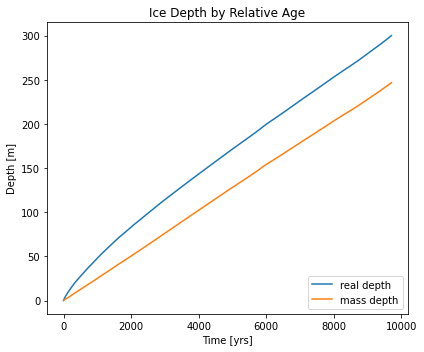

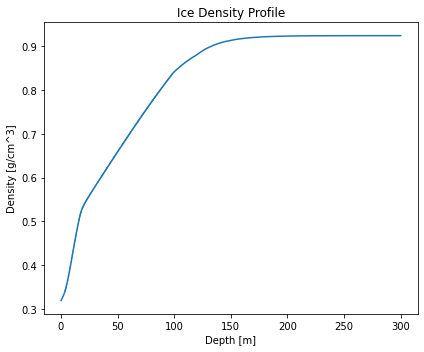

In [6]:
# Plot depth, mass depth, and time
fig, ax = plt.subplots(1,1, figsize=(6,5), tight_layout=True)
ax.plot(Prop.t, Prop.z, label='real depth')
ax.plot(Prop.t, Prop.h, label='water-eq. depth')
ax.set(xlabel='Time [yrs]',
       ylabel='Depth [m]')
ax.legend(loc='lower right', fontsize=10)
plt.title('Ice Depth by Relative Age')
plt.show()

# Plot density
fig, ax = plt.subplots(1,1, figsize=(6,5), tight_layout=True)
ax.plot(Prop.z, Prop.rho)
ax.set(xlabel='Depth [m]',
       ylabel='Density [g/cm^3]')
#ax.legend(loc='lower right', fontsize=10)
plt.title('Ice Density Profile')
plt.show()

## Propagation Models

In [7]:
Prop.clear_models()

In [10]:
atm = [(Prop.judge_nash, ()), (Prop.MCEq_atm, ()), (Prop.daemonflux_atm, ())]
atm_labels = ['JN-fit', 'MCEq-air', 'daemonflux']

ice = [(Prop.Heisinger_ice, ()), (Prop.MCEq_ice, ())]
ice_labels = ['_H-ice', '_MCEq-ice']

prod = [(Prop.Dyonisius_prod, ())]
prod_labels = ['']

prodfull = [(Prop.Heisinger_full, ())]
prodfull_labels = ['Heisinger']

flow = [(Prop.Basic_flow, ())]
flow_labels = ['']

In [11]:
Prop.set_models(atm=atm, atm_labels=atm_labels, ice=ice, ice_labels=ice_labels, prod=prod,
                prod_labels=prod_labels, flow=flow, flow_labels=flow_labels)

## Primary CR Flux

In [12]:
#Prop.set_primary_identity()

In [13]:
Prop.load_primary([(pm.HillasGaisser2012, "H3a")])

## Calculation

In [14]:
Prop.calculate()

C:\Users\walte\Documents\python-scripts\In-Situ-14C-Production\InSitu14CO.py:1097: RuntimeWarning: invalid value encountered in power
  W_K = (0.0874 * cosTH * (1- q * (y0/cosTH - 0.0874)/r_K/E_K))**(H_mu/cosTH/(r_K*E_K+90*q))


(1, 10, 2, 120)


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:47<00:00,  4.75s/it]


(1, 10, 2, 120)
(1, 10, 2, 120)
Atmosphere complete


 90%|█████████████████████████████████████████████████████████████████████████▊        | 9/10 [22:56<02:32, 152.93s/it]


KeyboardInterrupt: 

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5), tight_layout=True, sharex=True)

for i,c in enumerate(Prop.CO):
    ax1.plot(Prop.z[Prop.i_start:], c[0], label=Prop.model_names[i])
    ax2.plot(Prop.z[Prop.i_start:], c[0]/Prop.CO[0,0])

ax1.set(#xlim=(z[i_int][0],z[i_int][-1]),
       xlabel='depth [m]',
       ylim=(0,30),
       ylabel=r'$^{14}$CO concentration [molecule g$^{-1}$]')
ax1.legend(loc='lower right', fontsize=8)

ax2.set(xlim=(Prop.z[Prop.i_start],Prop.z[-1]),
       xlabel='depth [m]',
       #ylim=(0.98,1.06),
       ylabel=r'$^{14}$CO ratio')
#ax2.legend(loc='best', fontsize=10)

plt.suptitle('In Situ 14CO Concentration over Depth')
plt.show()

## Saving to csv

In [ ]:
#Prop.save_prod_to_csv('Matrices/')